## Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

SMALL_SIZE = 30
MEDIUM_SIZE = 35
BIGGER_SIZE = 45

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams.update({'font.size': 22})

## Defining constants, system of ODE's and initial conditions

In [2]:
g1 = 1.0014
g2 = 1.0
g3 = 0.982
s1 = 37.9*10**(-24) #cm^2
s2 = 64*10**(-24)
s3 = 76.4*10**(-24)
l23 = 8.056*10**-6 #s^-1
l4 = 1.156*10**-7 
l5 = 1.134*10**-5

def dSdt (t, S, f): #return vector of all ODE's in unit of days
    N1, N2, N3, N4, N5, N6 = S
    l1 = g1*s1*f 
    l24 = g2*s2*f
    l3 = g3*s3*f    
    return np.multiply([-l1*N1,
                        l1*N1-(l23+l24)*N2,
                        l23*N2-l3*N3,
                        l24*N2-l4*N4,
                        l3*N3+l4*N4-l5*N5,
                        l5*N5], 86400) 

N1_0 = 3.3*10**21 #1g de 186W
N2_0 = N3_0 = N4_0 = N5_0 = N6_0 = 0
S_0 = (N1_0, N2_0, N3_0, N4_0, N5_0, N6_0) #initial conditions

## Defining fluxes, decay rates and time

In [3]:
f=[2*10**13, 8*10**13, 2*10**14, 8*10**14, 2*10**15] # random set of fluxes from the range available

l = [g1*s1*f[0], 8.056*10**-6 + g2*s2*f[0], g3*s3*f[0], 1.156*10**-7, 1.134*10**-5] # only decay constants, 
                                                                                    # production not accounted

mass = [185.954362626, 186.957158956, 186.955750143, 187.958486139, 187.958111472, 187.955835244] # atomic mass of each nuclide

colors = ['b', 'r', 'g', 'm', 'c', 'y']

nuclides = ['$^{186}$W', '$^{187}$W', '$^{187}$Re', '$^{188}$W', '$^{188}$Re', '$^{188}$Os']

t= np.arange(0, 30, 0.001)

## Solving for 1g of 186W with a flux=2*10^13

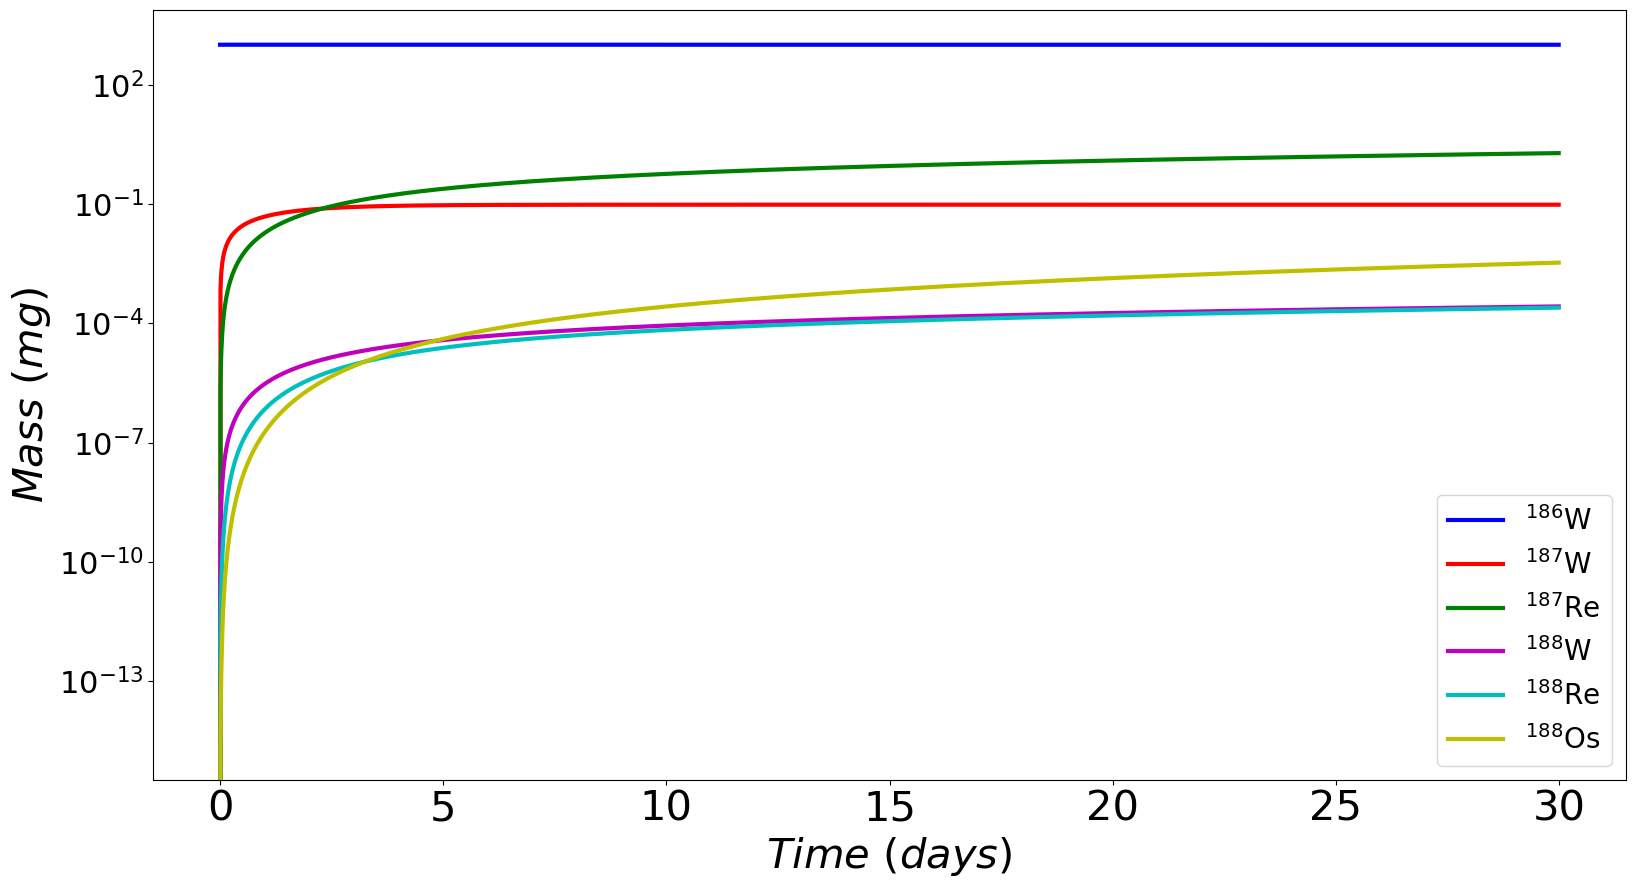

In [4]:
t= np.arange(0, 30, 0.01)
plt.figure( figsize=(19,10) )

for i in range(len(colors)):
    sol = odeint(dSdt, y0 = S_0, t=t, tfirst = True, args = (f[0],))
    plt.plot(t, sol.T[i]*(10**3)*mass[i]/(6.022*10**23), colors[i], label = nuclides[i], lw=3) # converting number of 
                                                                                                # nucleides to mg
        
plt.legend(frameon=True)

plt.yscale("log")
plt.xlabel('$Time\ (days)$')
plt.ylabel('$Mass\ (mg)$')
#plt.title(r"Evolution of all nuclides with $\phi = 2\times10^{13}$")
plt.savefig('Evolution of all nuclides.jpeg', dpi=300, bbox_inches='tight')

## Computing activity of all nuclides per 1mg of irradiated 186W

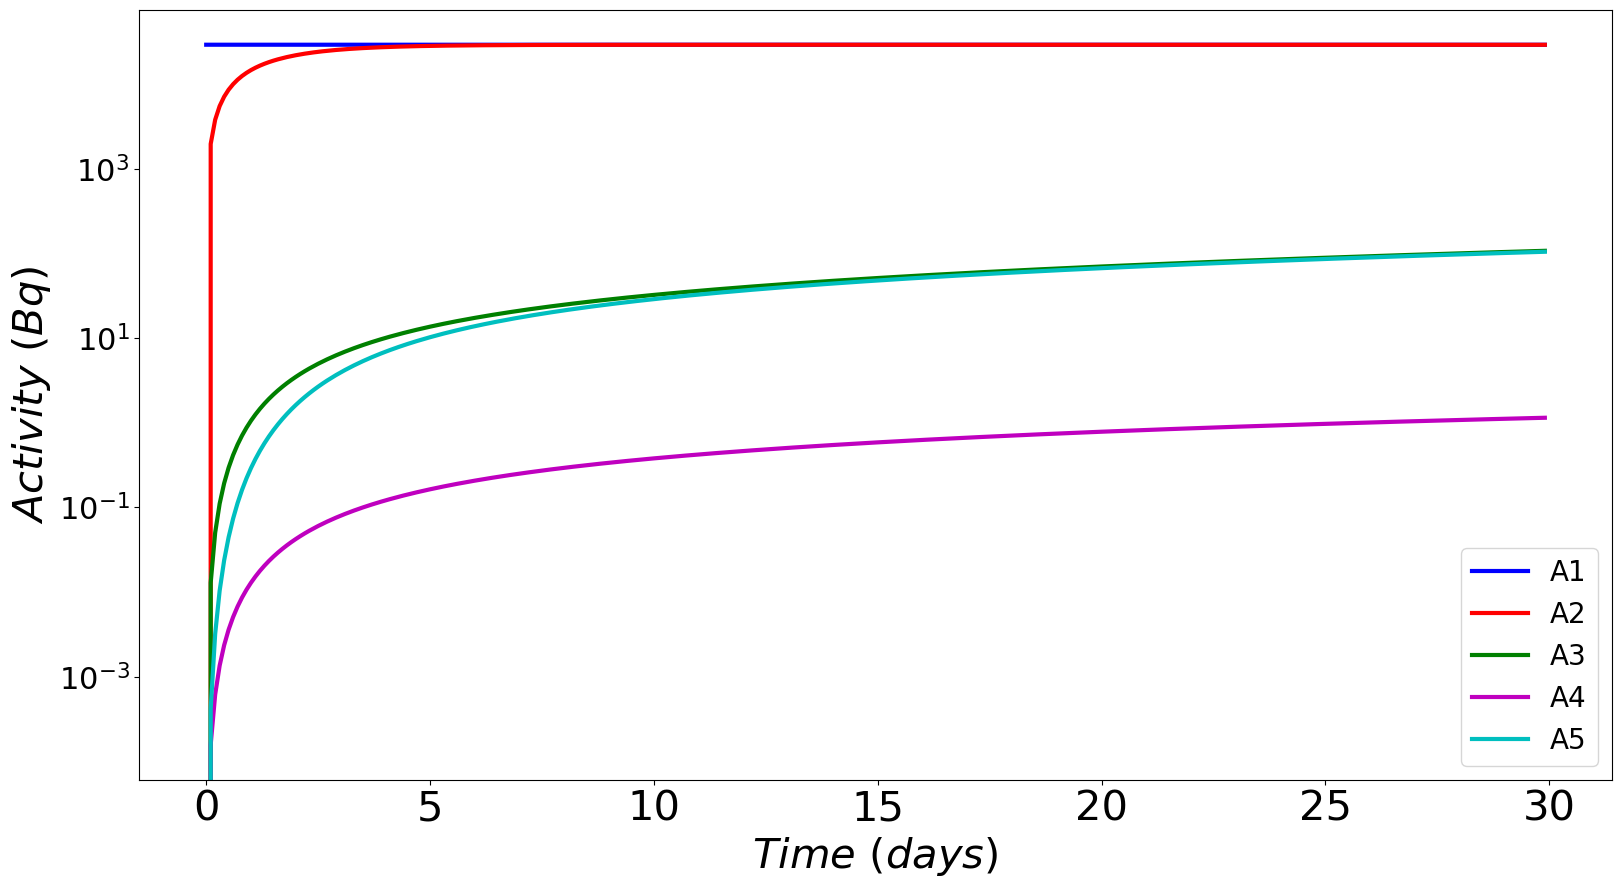

In [5]:
t= np.arange(0, 30, 0.1)
N1_0 = 3.3*10**21*10**-3 #1/1000 of initial quantity
S_0 = (N1_0, N2_0, N3_0, N4_0, N5_0, N6_0) #initial conditions

plt.figure( figsize=(19,10) )
for i in range(len(l)):
    sol = odeint(dSdt, y0 = S_0, t=t, tfirst = True, args = (f[0],))
    plt.plot(t, np.multiply(sol.T[i]/86400, l[i]), colors[i], label = 'A'+str(i+1), lw = 3)

plt.legend(loc='best')
plt.yscale("log")
plt.xlabel('$Time\ (days)$')
plt.ylabel(r'$Activity\ (Bq)$')
plt.savefig('Activity of all nuclides.jpeg', dpi=300, bbox_inches='tight')

## Variation of the activity of 188Re with the flux

Text(0, 0.5, '$A_5\\ (Bq)$')

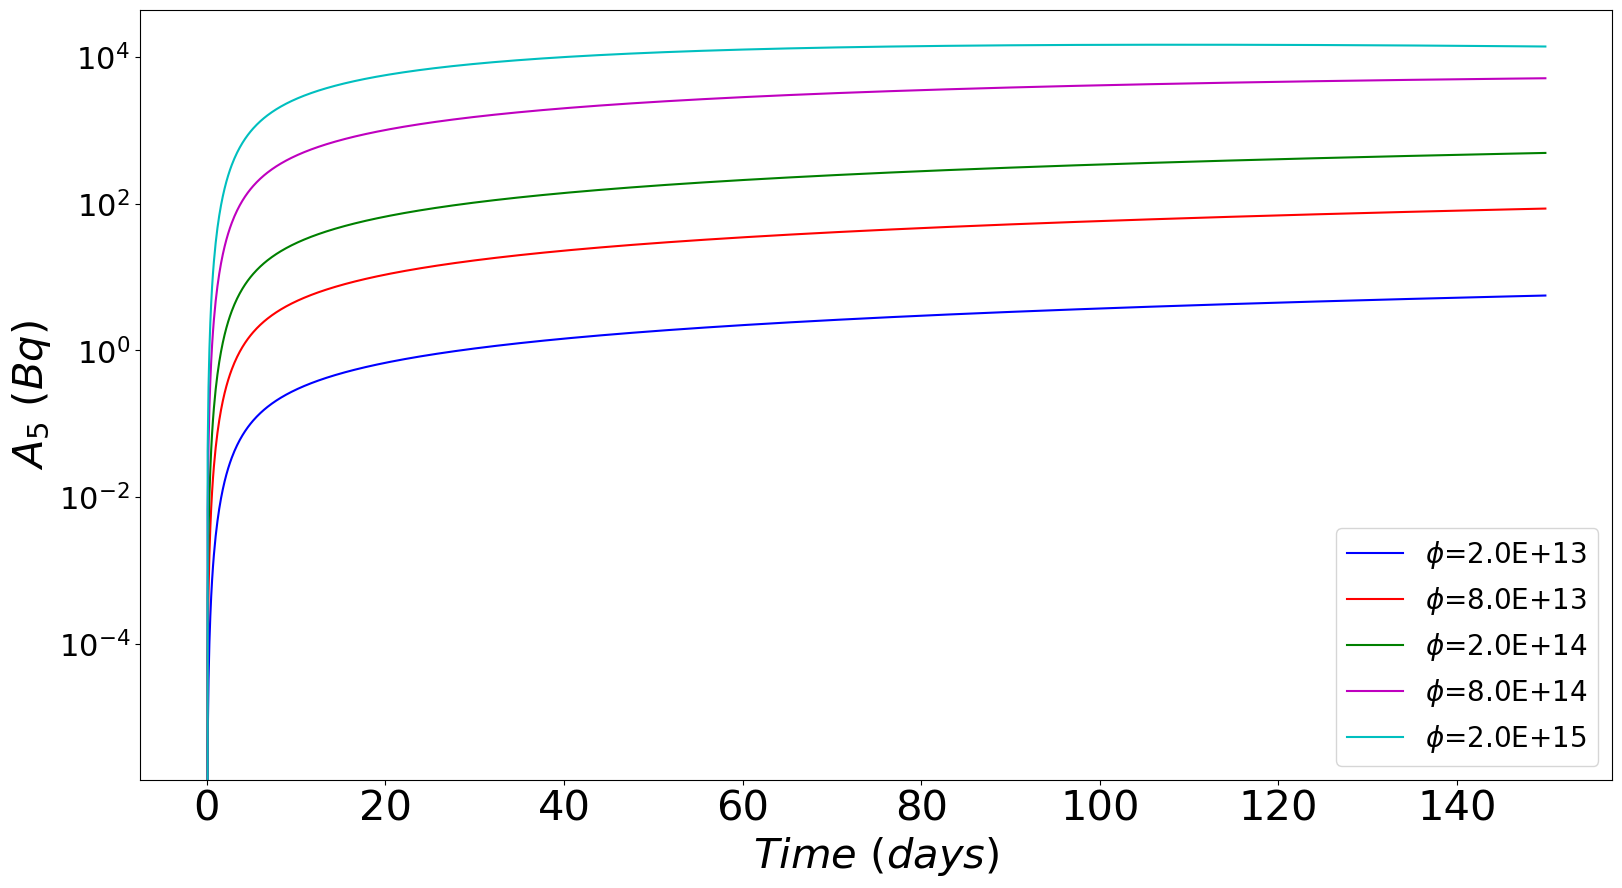

In [6]:
t= np.arange(0, 150, 0.1)
plt.figure( figsize=(19,10) )
for i in range(len(f)):
    sol = odeint(dSdt, y0 = S_0, t=t, tfirst = True, args = (f[i],))
    plt.plot(t, np.multiply(sol.T[4], l4)/86400, colors[i], label = r'$\phi$='+str(format(f[i], '.1E')))

plt.legend(loc='best')
plt.yscale("log")
plt.xlabel('$Time\ (days)$')
#plt.ylim(10, 10**10)
plt.ylabel(r'$A_5\ (Bq)$')

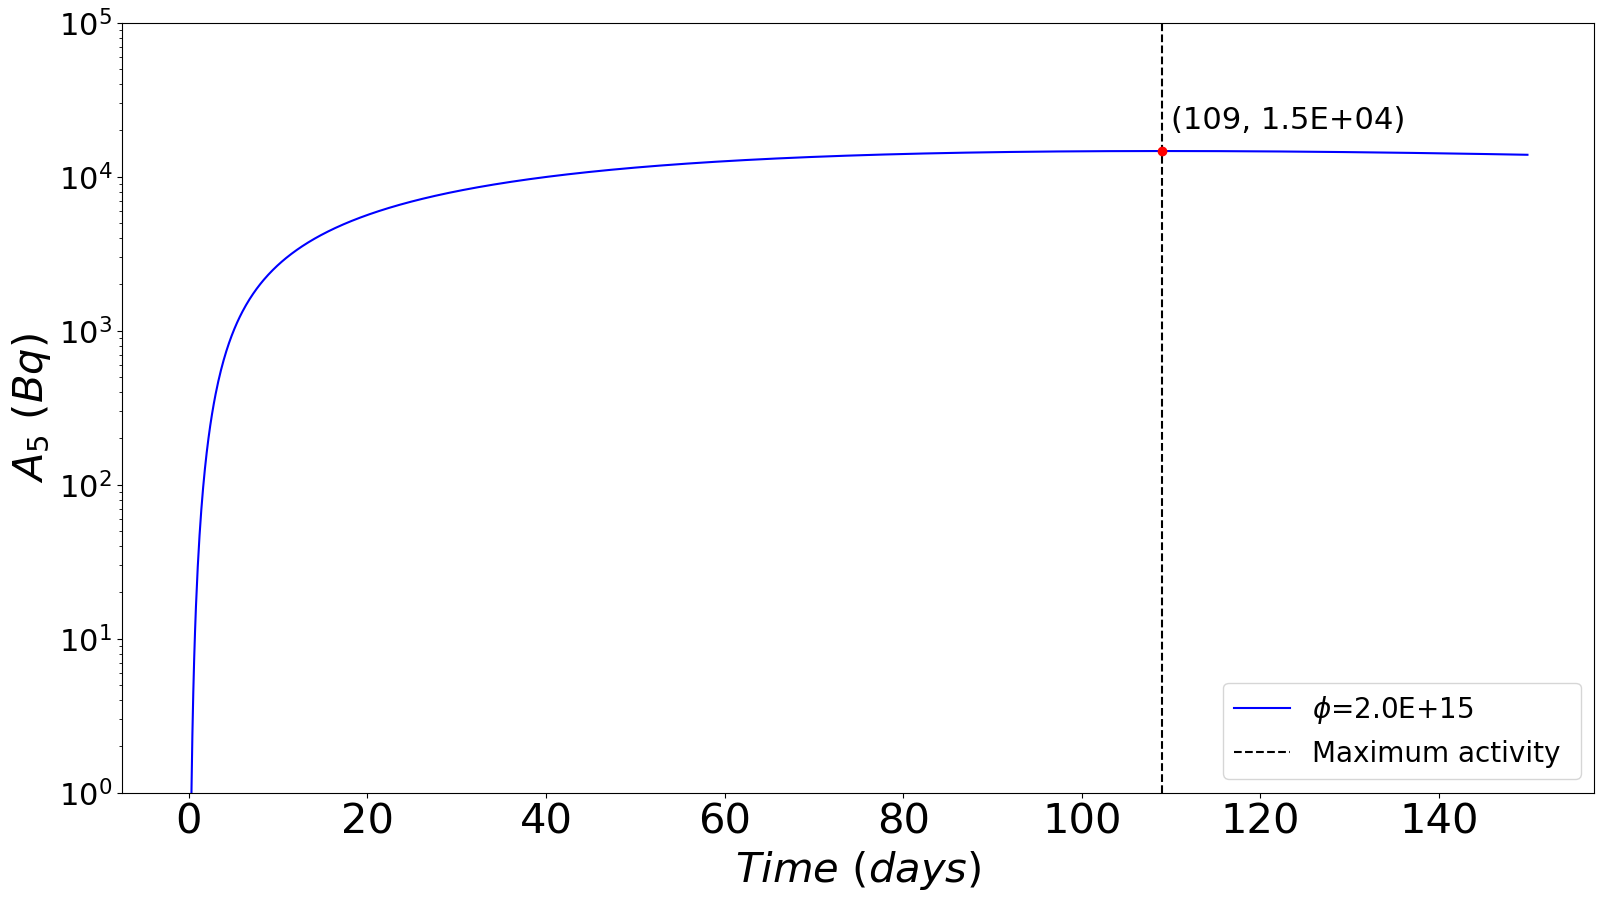

In [7]:
t= np.arange(0, 150, 0.1)
plt.figure( figsize=(19,10) )

sol = odeint(dSdt, y0 = S_0, t=t, tfirst = True, args = (f[4],))
plt.plot(t, np.multiply(sol.T[4], l4)/86400, color = 'b', label = r'$\phi$='+str(format(f[i], '.1E')))

plt.axvline(x = 109, c= 'k',ls ="--", label = 'Maximum activity ') 
xy= (109,1268642547.2120254/86400)
plt.annotate('(%.f, %.1E)' % xy, xy, xytext=(110,1768642547.2120254/86400))
plt.plot(109,1268642547.2120254/86400 , 'o', color = 'r')

plt.legend(loc ="lower right")
plt.yscale("log")
plt.xlabel('$Time\ (days)$')
plt.ylim(10**0, 10**5)
plt.ylabel(r'$A_5 \ (Bq)$')
plt.savefig('MAximum activity.jpeg', dpi=300, bbox_inches='tight')

## Time for maximum activity of 188Re (F=2*10^15)

In [13]:
t= np.arange(0, 150, 0.1)
sol = odeint(dSdt, y0 = S_0, t=t, tfirst = True, args = (f[4],))

t_max_index = list(sol.T[4]).index(sol.T[4].max())

t_max = t[t_max_index]

maxi = np.multiply(sol.T[4], l4).max()

print ("Atividade máxima =", maxi)
print("Tempo para atividade máxima:", t_max)

Atividade máxima = 1268642547.2120254
Tempo para atividade máxima: 109.0


## Variation of 188W activity with the flux

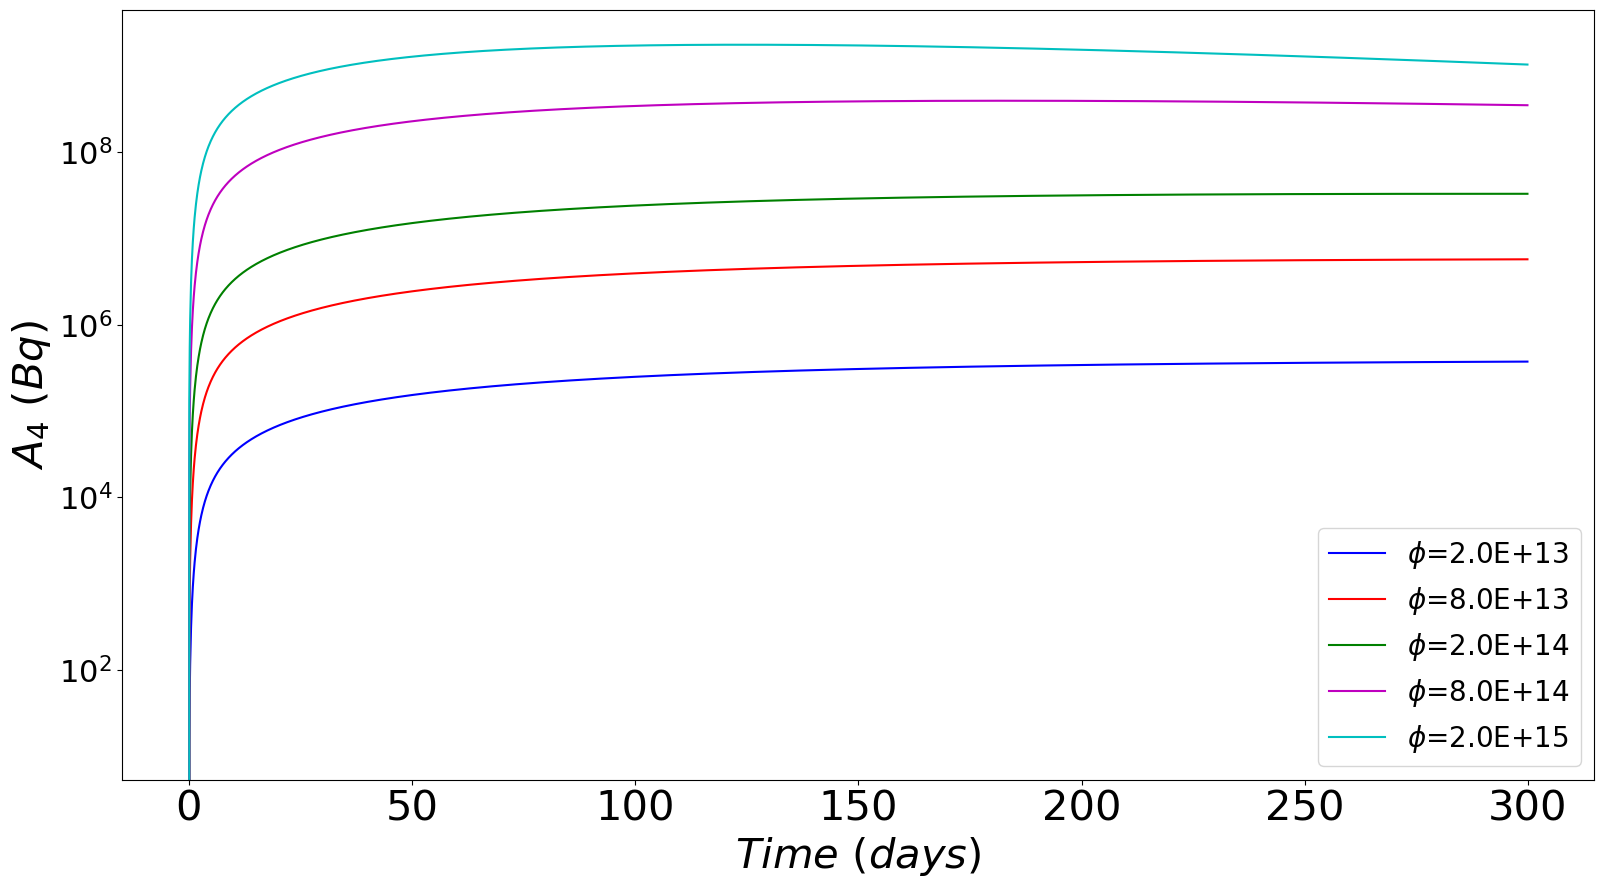

In [9]:
t= np.arange(0, 300, 0.1)
plt.figure( figsize=(19,10) )
for i in range(len(f)):
    sol = odeint(dSdt, y0 = S_0, t=t, tfirst = True, args = (f[i],))
    plt.plot(t, np.multiply(sol.T[3], l4), colors[i], label = r'$\phi$='+str(format(f[i], '.1E')))

plt.legend(loc='best')
plt.yscale("log")
plt.xlabel('$Time\ (days)$')
plt.ylabel('$A_4 \ (Bq)$')
#plt.title("Variation of the activity of $^{188}$W with the flux")
plt.savefig("188W varying with flux.jpeg", dpi=300)

## Activity of 187W after stopping the irradiation

Text(0.5, 1.0, 'Variation of the activity of $^{187}$W with no flux')

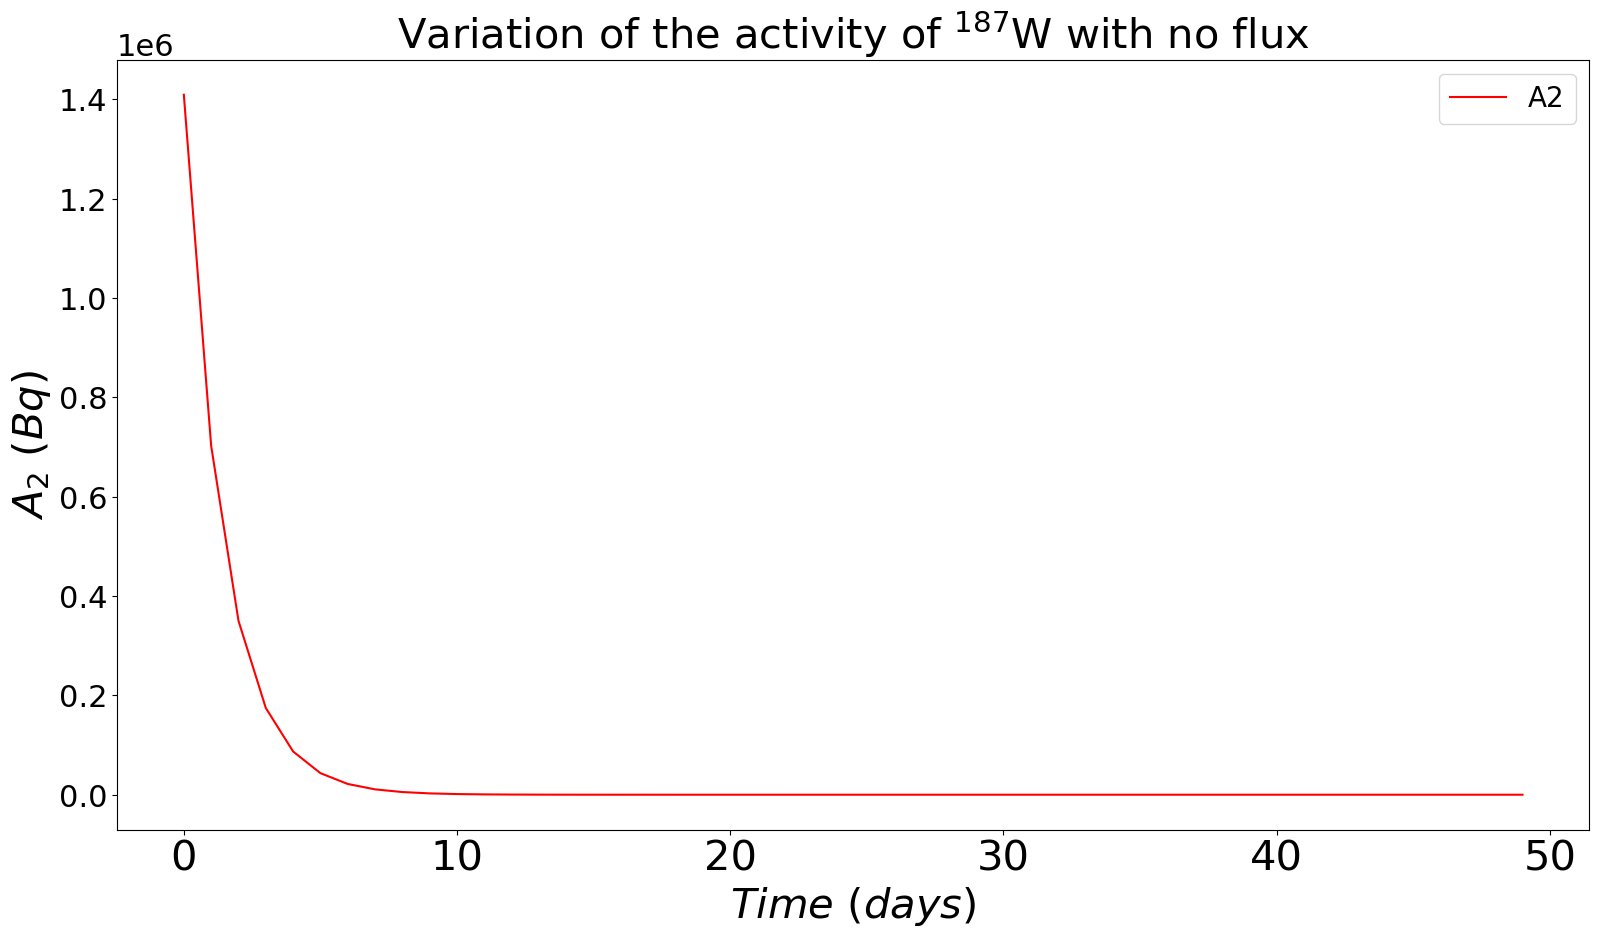

In [10]:
def no_flux (t, S): #return vector of all ODE's in unit of days with flux turned off
    N1, N2, N3, N4, N5, N6 = S
    return np.multiply([0, 
                        -l23*N2,
                        0,
                        -l4*N4,
                        -l5*N5,
                        0], 86400) 

a = list(sol.T[4]).index(sol.T[4].max()) #index onde a atividade de 188Re é máxima

S_1 = [sol.T[i][a] for i in range(len(l)+1)] #condições iniciais de N_# quando a atividade de 188Re é máxima
    
t = np.arange(0, 50, 1)
sol_1 = odeint(no_flux, y0 = S_1, t=t, tfirst= True)

plt.figure( figsize=(19,10) )
plt.plot(t, np.multiply(sol_1.T[1], l[1])/86400, 'r', label = "A2")
plt.legend(loc='best')
#plt.yscale("log")
plt.xlabel('$Time\ (days)$')
plt.ylabel(r'$A_2 \ (Bq)$')
plt.title("Variation of the activity of $^{187}$W with no flux")

## Irradiation done in shifts of 12 h/day during 5 days/week

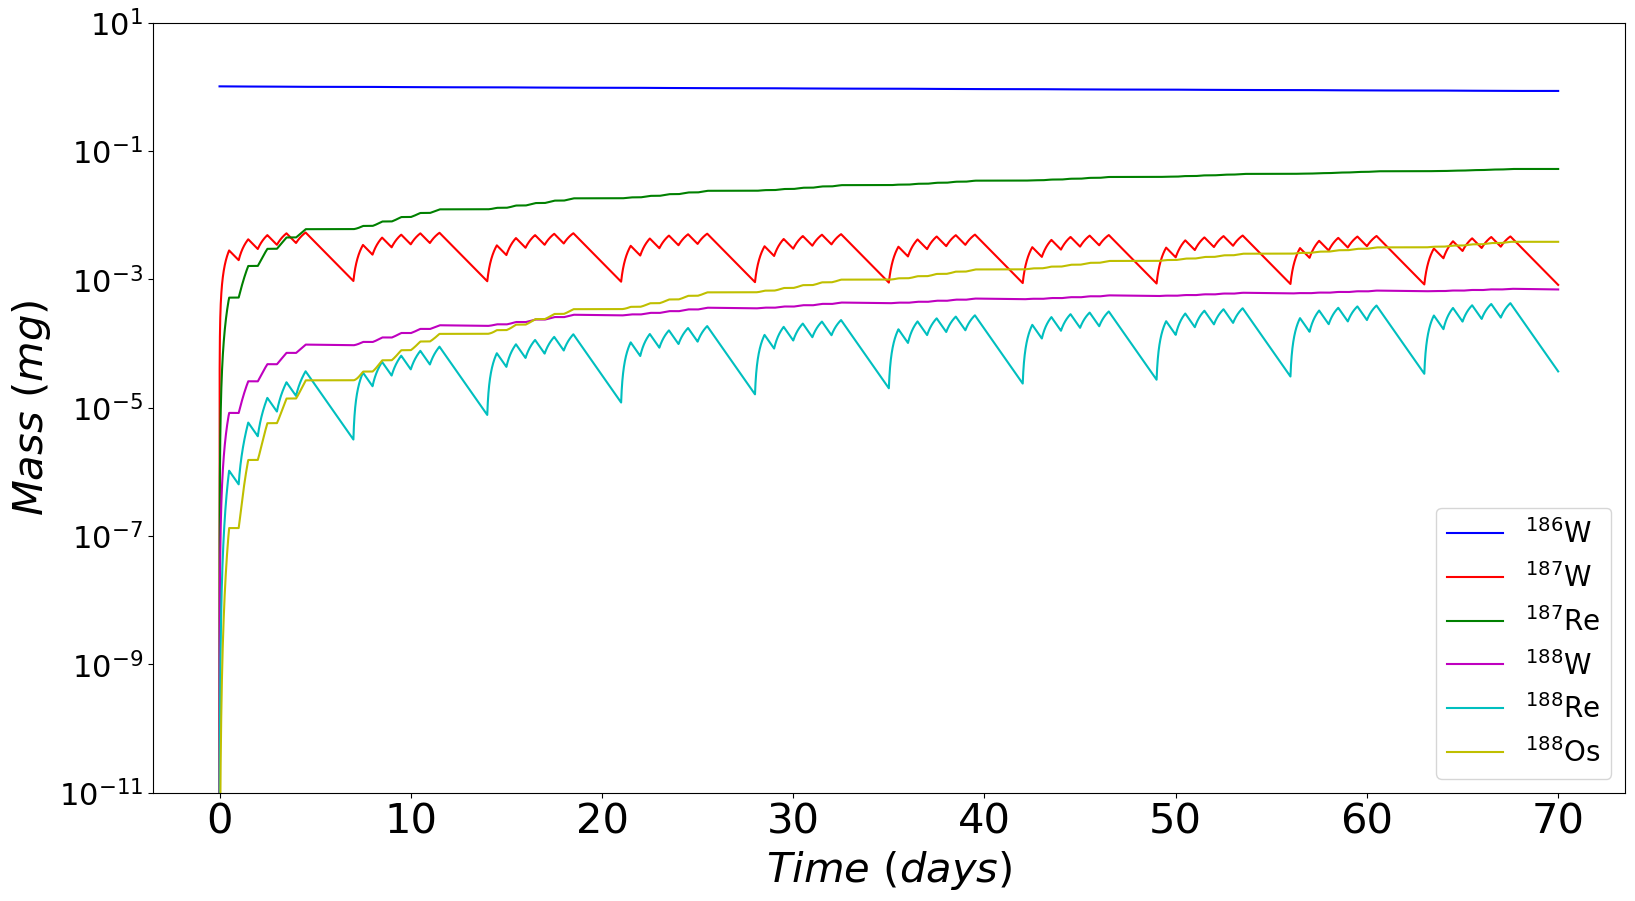

In [11]:
massa_gramas = 1/1000

N1_0 = massa_gramas*3.3*10**21
N2_0 = N3_0 = N4_0 = N5_0 = N6_0 = 0
S_0 = [N1_0, N2_0, N3_0, N4_0, N5_0, N6_0] #initial conditions

t12hours = np.linspace(0, 0.5 , 501)

def off12hours(tf,S):
    sol = odeint(no_flux, y0 = S, t=tf, tfirst = True)
    return sol

def on12hours(tf,S):
    sol = odeint(dSdt, y0 = S, t=tf, tfirst = True, args = (f[4],))
    return sol

def cond_inicial(S):
    return S[-1]
    
n_semanas = 10
t = np.linspace(0, 7*n_semanas , 7000*n_semanas + 1)
vetor = [0]

for i in range(n_semanas):
    for i in range(5):
        vetor.pop(-1)
        vetor.extend(list(on12hours(t12hours, S_0)))
        S_0 = cond_inicial(vetor)
        vetor.pop(-1)
        vetor.extend(list(off12hours(t12hours, S_0)))
        S_0 = cond_inicial(vetor)
    for i in range(4):
        vetor.pop(-1)
        vetor.extend(list(off12hours(t12hours, S_0)))
        S_0 = cond_inicial(vetor)
 
vetor = np.array(vetor)

plt.figure(figsize=(19,10))

for i in range(len(colors)):
    plt.plot(t, np.multiply(vetor.T[i],1)*(10**3)*mass[i]/(6.022*10**23), colors[i], label = nuclides[i])
    
plt.legend(loc='best')
plt.yscale("log")
plt.xlabel('$Time \ (days)$')
plt.ylabel('$Mass\ (mg)$')
#plt.title("Evolution after " + str(n_semanas) + " weeks.")
plt.ylim((10**-11,10**1))
plt.savefig("Shifts")

Tempo de otimização 18.5
Massa no tempo de otimização com fluxo intermitente: 447196267784641.4
Massa no tempo de otimização com fluxo constante: 3914876316349835.5


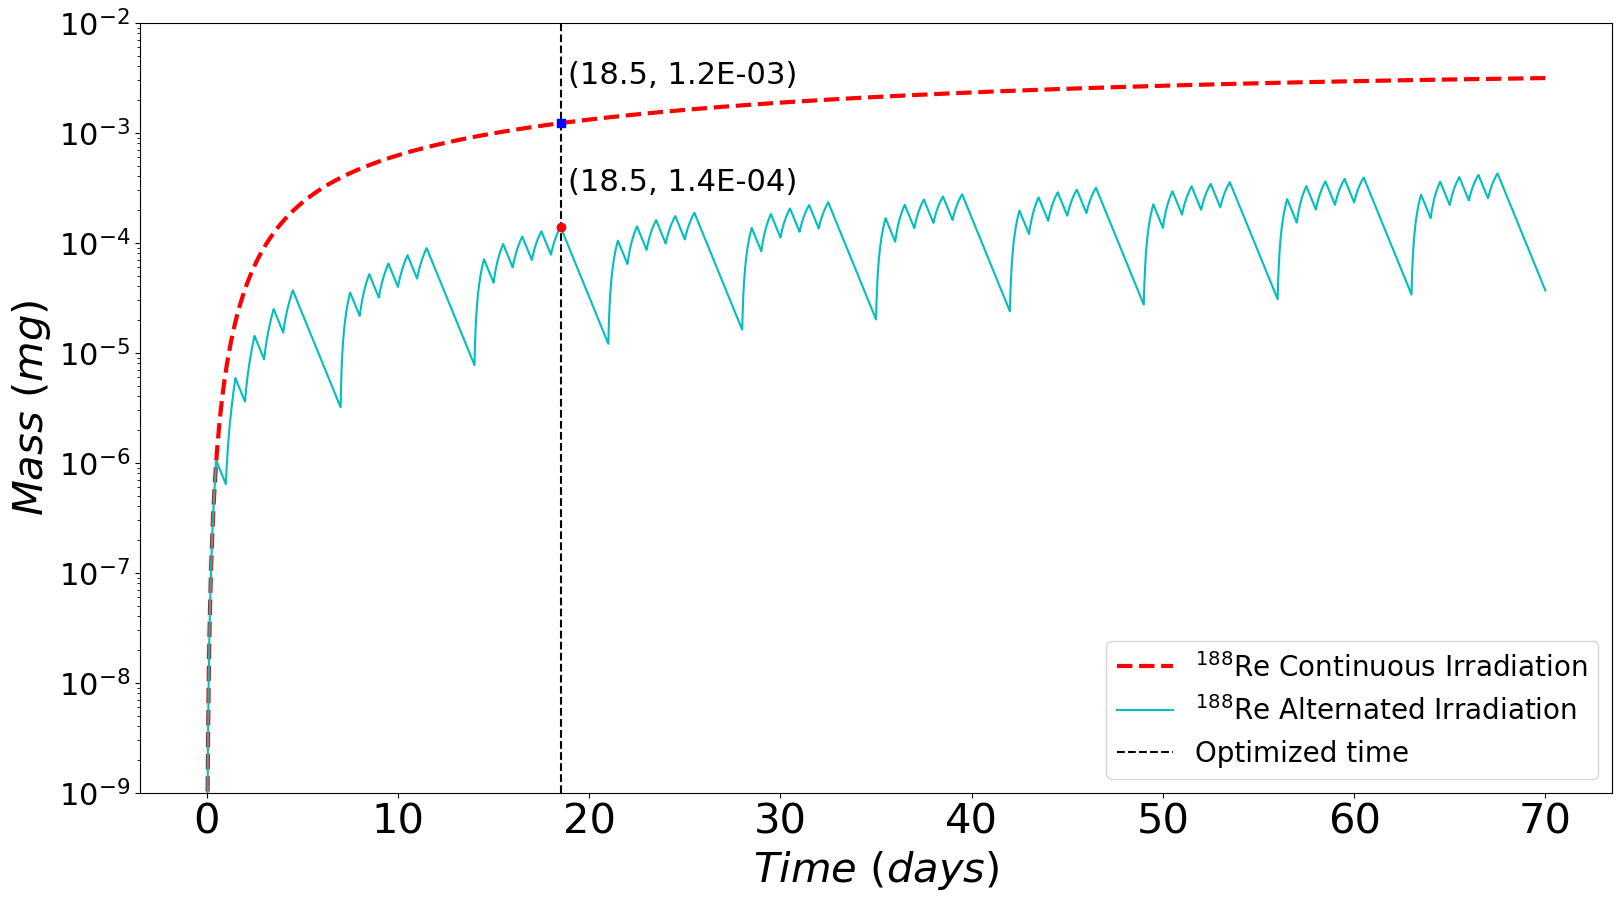

In [14]:
t = np.linspace(0, 7*n_semanas , 7000*n_semanas + 1)

plt.figure(figsize=(19,10))

sol = odeint(dSdt, y0 = S_0, t=t, tfirst = True, args = (f[4],))
plt.plot(t, sol.T[4]*(10**3)*mass[4]/(6.022*10**23), 'r', label = '$^{188}$Re Continuous Irradiation', lw=3, ls ="--")


S_0 = [N1_0, N2_0, N3_0, N4_0, N5_0, N6_0] #initial conditions
plt.plot(t, np.multiply(vetor.T[4],1)*(10**3)*mass[4]/(6.022*10**23), colors[4], label = '$^{188}$Re Alternated Irradiation')

#plt.legend(loc='best')
plt.yscale("log")
plt.xlabel('$Time \ (days)$')
plt.ylabel('$Mass\ (mg)$')
#plt.title("Evolution after " + str(n_semanas) + " weeks.")
plt.ylim((10**-9,10**-2))


vetor_a = list(vetor.T[4])[10000:20001]
vetor_v = list(sol.T[4])[10000:20001]
vetor_t = list(t)[10000:20001]


print("Tempo de otimização", vetor_t[vetor_a.index(max(vetor_a))])
print('Massa no tempo de otimização com fluxo intermitente:', max(vetor_a))
print('Massa no tempo de otimização com fluxo constante:', vetor_v[vetor_t.index(18.5)])

plt.axvline(x = 18.5, c= 'k',ls ="--", label = 'Optimized time ') 
xy= (18.5, 447196267784641.4*(10**3)*mass[4]/(6.022*10**23))
plt.annotate('(%.1f, %.1E)' % xy, xy, xytext=(18.9, 947196267784641.4*(10**3)*mass[4]/(6.022*10**23)))
plt.plot(18.5, 447196267784641.4*(10**3)*mass[4]/(6.022*10**23) , 'o', color = 'r')

xy= (18.5, 3914876316349835.5*(10**3)*mass[4]/(6.022*10**23))
plt.annotate('(%.1f, %.1E)' % xy, xy, xytext=(18.9, 9047196267784641.4*(10**3)*mass[4]/(6.022*10**23)))
plt.plot(18.5, 3914876316349835.5*(10**3)*mass[4]/(6.022*10**23) , 's', color = 'b')

plt.legend(loc='best')
plt.savefig('optimized time.jpeg', dpi=300, bbox_inches='tight')